# Evaluation of Model Performance

### Learning Objectives:
- [Evaluating Models With Test Sets](#Evaluating-Models-With-Test-Sets)
- [K-fold Cross Validation](#K\-fold-Cross-Validation)

# Evaluating Models With Test Sets
Now you have looked at different types of models. But how do we evaluate their performance? What would happen if we trained our model with the input data, then tested the performance of our model on the data we used to train it? This is not ideal, as the model has trained to fit that particular data. We are more interested in the ability of a model to make accurate predictions on data is has never seen before, or in other words, its __generalization__.

One way to evaluate this is by carrying out __cross validation (CV)__, which is a technique used to test the effectiveness of a machine learning models, as well as a re-sampling procedure used to evaluate a model if we have a limited data. One method of cross-validation can be done by splitting our dataset into two sets: a __training set__ and a __test set__. The training dataset is used to train our model, and we used the remaining data in the test set to evaluate the generalization of the model. Since the model has never seen the test set before, this is representative of applying the model to other data it would encounter in the real-world.

Let us consider the simple example for linear regression below:

In [53]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from utils import get_regression_data, visualise_regression_data
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_iris

In [54]:
# Splitting data into training and test datasets of input-output pairs

def split_data(X, Y, train_portion, test_portion):
    data = [(x, y) for x, y in zip(X, Y)]

    np.random.shuffle(data)
    n = len(data)
    n_train = round(n*train_portion)
    
    train_data = data[0:n_train]
    test_data = data[n_train:]
    return train_data, test_data

def get_Y(data_pairs):
    return np.array([pair[1] for pair in data_pairs])
def get_X(data_pairs):
    return np.array([pair[0] for pair in data_pairs])

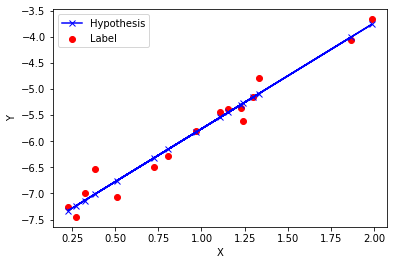

In [55]:
# Fitting our regression model
X, Y = get_regression_data()
train_data, test_data = split_data(X, Y, 0.8, 0.2)

reg = LinearRegression().fit(get_X(train_data), get_Y(train_data))
Y_pred = reg.predict(get_X(train_data))
visualise_regression_data(get_X(train_data), get_Y(train_data), Y_pred)

Now that we have fit our regression model onto our training data, we can evaluate its performance using the test set via two metrics, the MSE, that measures the average squared differences between the prediction and label, defined as:

$$MSE(y_{true}, y_{pred}) = \frac{1}{n_{samples}}\sum (y_{true} - y_{pred})^{2}$$

As well as the $R^{2}$ coefficient, which represents the proportion of variance in the outcome of our model is capable of predicting based on its features, defined as:

$$R^{2}(Y_{true}, Y_{pred}) = 1 - \frac{\sum (y_{true} - y_{pred})^{2}}{\sum (y_{true} - \bar{y})^{2}}$$

We show these below for our regression model on data that our model has not encountered, which is our test dataset. We can also compare these metrics to how the model does with the training data.

In [56]:
# Evaluating performance on test data

def MSE(y_true, y_pred):
    diff = (y_true - y_pred)**2
    return np.mean(diff)

def R2(y_true, y_pred):
    y_bar = np.mean(y_pred)
    diff_pred = np.sum((y_true - y_pred)**2)
    diff_mean = np.sum((y_true - y_bar*np.ones(y_true.shape[0]))**2)
    r2 = 1 - (diff_pred/diff_mean)
    return r2

# Training data
print("Training data:")
print("MSE:", MSE(get_Y(train_data), Y_pred))
print("R2:", R2(get_Y(train_data), Y_pred))
print()

# Test data
Y_pred = reg.predict(get_X(test_data))
print("Test data:")
print("MSE:", MSE(get_Y(test_data), Y_pred))
print("R2:", R2(get_Y(test_data), Y_pred))

Training data:
MSE: 0.043312768657695136
R2: 0.9976877997544099

Test data:
MSE: 0.1045878080205426
R2: 0.9809224111887102


The same logic can be applied to classification models. Let us import the iris dataset and fit a logistic regression model to it. This dataset has four input features and three possible classes.

In [57]:
# Fitting model to our data
X, Y = load_iris(return_X_y=True)
train_data, test_data = split_data(X, Y, 0.8, 0.2)
X_train, Y_train = np.array(get_X(train_data)), np.array(get_Y(train_data))

clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_train)

Now that we have fit our logistic regression model to the iris data, we can apply our metrics to measure the scores/error of the model. For classification models, the simplest metric is __accuracy__, which is given as follows:

$$accuracy = \frac{\text{correct predictions}}{all predictions}$$

We can also measure __precision__, given as follows:

$$precision = \frac{\text{true positives}}{\text{true positives + false positives}}$$

These two metrics are computed below for the training set and the test set:

In [58]:
# Computing accuracy and precision of our model on both training and test datasets
def accuracy(Y_true, Y_pred):
    correct_count = 0
    for y_true, y_pred in zip(Y_true, Y_pred):
        if y_true == y_pred:
            correct_count += 1
    accuracy = correct_count/Y_true.shape[0]
    return accuracy

def precision(Y_true, Y_pred):
    class_list = list(set(Y_true))
    
    true_positives = np.zeros(len(class_list))
    false_positives = np.zeros(len(class_list))
    for y_true, y_pred in zip(Y_true, Y_pred):
        for idx, label in enumerate(class_list):
            if y_pred == label:
                if y_pred == y_true:
                    true_positives[idx]+=1
                else:
                    false_positives[idx]+=1
    precision = np.sum(true_positives)/(np.sum(true_positives) + np.sum(false_positives))
    return precision

# Training data
print("Training data:")
print("accuracy:", accuracy(Y_pred, Y_train))
print("precision:", precision(Y_pred, Y_train))
print()

# Test data
X_test, Y_test = np.array(get_X(test_data)), np.array(get_Y(test_data))
Y_pred = clf.predict(X_test)
print("Test data:")
print("accuracy:", accuracy(Y_pred, Y_test))
print("precision:", precision(Y_pred, Y_test))

Training data:
accuracy: 0.9666666666666667
precision: 0.9666666666666667

Test data:
accuracy: 0.9333333333333333
precision: 0.9333333333333333


And there you have it. We see that our models even performs well on data it had never seen before, validating the capacity of the model to generalize. However, if we have a small dataset, this approach may result in bias, as the model misses information that it did not receive during training. Hence, we introduce another method of cross-validation that generally results in less bias.

# K-fold Cross-Validation

Another method for cross-validation is the __k-fold cross-validation__ method, which generally ensures lower bias, as it allows for every observation to appear in both the training and test datasets. This approach is especially useful when we have a limited amount of data.

How do we apply this method? We split our data into _k_ __folds__, each with an equal number of observations. We then assign k-1 folds to the training dataset, and test our trained model on the k fold that was not used to train the model. We alternate which of the k folds is used as a test set until all folds have been both used in the training and test datasets. For each round of training, we calculate the metric, and this method returns the average metrics calculated for each round of training. We show how this method can be applied below:

<img src="https://miro.medium.com/max/523/1*C5FJt_NH1BWJrFSvw_6jtw.png" width="500px" height="500px"/>

In [80]:
# Splits data into k_folds
def k_split(X, Y, k_folds):
    fold_size = int(Y.shape[0]/k_folds)
    X_folds, Y_folds = [], []
    for i in range(k_folds):
        try:
            X_folds.append(X[i*fold_size:(i+1)*fold_size])
            Y_folds.append(Y[i*fold_size:(i+1)*fold_size])
        except:
            X_folds.append(X[i*fold_size:])
            Y_folds.append(Y[i*fold_size:])
    
    return X_folds, Y_folds
        
# Computes average metrics by using all folds for testing and training separately
def k_fold_validation(X, Y, k_folds, metrics, model):
    metric_values = np.zeros((k_folds, len(metrics))) # k values per metric
    
    for k in range(k_folds):
        X_folds, Y_folds = k_split(X, Y, k_folds) # resplit our data into k_folds
        X_test = X_folds[k]
        Y_test = Y_folds[k]
        del X_folds[k]
        del Y_folds[k]
        
        # remaining elements are part of the training dataset
        X_train = np.array([observation for fold in X_folds for observation in fold])
        Y_train = np.array([label for fold in Y_folds for label in fold])
        
        # fitting our chosen model to the selected training data
        model_fit = model.fit(X_train, Y_train)
        Y_pred = model_fit.predict(X_test)
        for idx, metric in enumerate(metrics):
            metric_values[k, idx] = metric(Y_test, Y_pred)
    metric_values = np.mean(metric_values, axis=0)
    
    return metric_values

In [81]:
# Regression k-fold cross validation
X, Y = get_regression_data()
metric_values = k_fold_validation(X, Y, 2, (MSE, R2), LinearRegression())
print(metric_values)

[0.11514277 0.97676133]


In [83]:
# Classification k-fold cross-validation
X, Y = load_iris(return_X_y=True)
metric_values = k_fold_validation(X, Y, 8, (accuracy, precision), LogisticRegression(random_state=0))
print(metric_values)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.92361111 0.99305556]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


scikit-learn also provides us with an iterator to help us carry out k-fold cross-validation, as shown below for the regression case:

In [72]:
from sklearn.model_selection import KFold

X, Y = get_regression_data()
kf = KFold(n_splits=3)
MSEs = np.array([])
R2s = np.array([])
for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
    reg = LinearRegression().fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    MSEs = np.append(MSEs, MSE(Y_test, Y_pred))
    R2s = np.append(R2s, R2(Y_test, Y_pred))

print("MSE:", np.mean(MSEs))
print("R2s:", np.mean(R2s))

MSE: 0.03882632520035822
R2s: 0.9731267744354652


Expanding on k-fold cross validation, we can also carry out __repeated k-fold cross-validation__, where we repeat the k-fold cross validation process _n_ times, where the folds are different in every iteration, then take the average metric.